# Migration and Analysis

We must ensure that the database is created in MySQL before proceeding with the migration.  
![alt text](image.png)

In [ ]:
import pandas as pd
import sys
sys.path.append("C:/Users/gabri/OneDrive/Documentos/Universidad/ETL/workshop")
from db_folder.db import get_connection  # import get_connection from db.py
import numpy as np

def create_table():
    conn = get_connection()
    cursor = conn.cursor()

    cursor.execute("""
        CREATE TABLE IF NOT EXISTS candidates (
            id INT AUTO_INCREMENT PRIMARY KEY,
            first_name VARCHAR(255),
            last_name VARCHAR(255),
            email VARCHAR(255),
            application_date DATE,
            country VARCHAR(10),
            yoe INT,
            seniority VARCHAR(50),
            technology VARCHAR(100),
            code_challenge_score FLOAT,
            technical_interview FLOAT,
            score FLOAT,
            hired BOOLEAN
        )
    """)

    conn.commit()
    cursor.close()
    conn.close()
    print("Tabla 'candidates' creada exitosamente.")

def insert_data():
    conn = get_connection()
    cursor = conn.cursor()

    df = pd.read_csv("C:/Users/gabri/OneDrive/Documentos/Universidad/ETL/workshop/csv/candidates_cleaned.csv")
    df = df.replace({np.nan: None})

    insert_query = """
        INSERT INTO candidates (
            first_name, last_name, email, application_date, country, yoe, seniority, 
            technology, code_challenge_score, technical_interview, score, hired
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """

    data = [
        (
            row["First Name"], row["Last Name"], row["Email"], row["Application Date"],
            row["Country"], row["YOE"], row["Seniority"], row["Technology"],
            row["Code Challenge Score"], row["Technical Interview Score"], row["Score"],
            row["Hired"]
        )
        for _, row in df.iterrows()
    ]

    cursor.executemany(insert_query, data)
    conn.commit()
    cursor.close()
    conn.close()
    print("Datos insertados exitosamente en la base de datos.")

# Ejecutar las funciones
create_table()
insert_data()


Tabla 'candidates' creada exitosamente.
Datos insertados exitosamente en la base de datos.


# Explanation

With this code, we do the following:

+ Establish the connection to the database, which is already defined inside the `db_folder`.  
+ Create the `candidates` table and define the columns as they are set in **cleanData-002.ipynb**, meaning with the cleaned CSV.

| Column Name                     | Data Type          |
|---------------------------------|-------------------|
| First Name                      | object            |
| Last Name                       | object            |
| Email                           | object            |
| Application Date                | datetime64[ns]    |
| Country                         | object            |
| YOE                              | int64             |
| Seniority                       | object            |
| Technology                      | object            |
| Code Challenge Score            | int64             |
| Technical Interview Score       | int64             |
| Score                           | float64           |
| Hired                           | bool              |

**Note:** In the database, we define column names using **snake_case** to improve readability and maintain consistency.


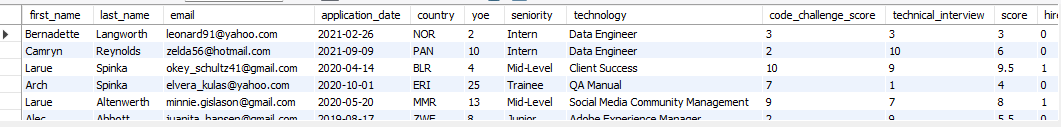

These are the data from our `candidates_cleaned.csv` file, which we obtained in our **cleanData-002.ipynb** notebook.
